In [51]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
wholesale_customers = pd.read_csv('wholesale+customers\wholesale_customers.csv')

In [53]:
wholesale_customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [54]:
wholesale_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [55]:
wholesale_customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [56]:
wholesale_customers.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

### KMeanClustering: No Data Preprocessing finding out the number of clusters through the elbow plot

In [57]:
#With no data preprocessing setting up the parameters
from pycaret.clustering import *
KMeanClusteringParams = setup(wholesale_customers)

,Description,Value
0,Session id,2741
1,Original data shape,"(440, 8)"
2,Transformed data shape,"(440, 8)"
3,Numeric features,8
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


## Building KMean Clustering Model

In [58]:
#buildiing KMean clustering model
meanshifthiftModel = create_model('meanshift')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3644,54.7541,0.5765,0,0,0


In [59]:
plot_types = ['cluster', 'tsne']

In [60]:
for pt in plot_types: 
    plot_model(meanshifthiftModel, plot = pt)

In [61]:
#get number of clusters from the elbow plot 
num_clusters = [4, 5, 6]

In [62]:
import pandas as pd
from pycaret.clustering import create_model

NDP = pd.DataFrame()  # NDP is no data preprocessing
for n in num_clusters:
    KMeanClusteringModel = create_model('meanshift', num_clusters=n)
    evaluation_results = pull()
    evaluation_results_df = pd.DataFrame(evaluation_results)
    # Add 'num_clusters' column filled with value n
    evaluation_results_df['num_clusters'] = n
    # Concatenate evaluation results DataFrame with NDP
    NDP = pd.concat([evaluation_results_df, NDP], axis=0, ignore_index=True)

# Now NDP contains all the evaluation results for each number of clusters with 'num_clusters' column indicating the corresponding number of clusters


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3644,54.7541,0.5765,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3644,54.7541,0.5765,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3644,54.7541,0.5765,0,0,0


In [63]:
#order by number of clusters 
NDP.sort_values(by='num_clusters', ascending=True, inplace=True)

In [64]:
NDP

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness,num_clusters
2,0.3644,54.7541,0.5765,0,0,0,4
1,0.3644,54.7541,0.5765,0,0,0,5
0,0.3644,54.7541,0.5765,0,0,0,6


### Using Normalization (z-score)

In [65]:
#Using Normalization on data
setup(data = wholesale_customers, normalize = True, normalize_method = 'zscore', verbose = False)

In [66]:
x = create_model('meanshift')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4054,30.8599,0.4229,0,0,0


In [67]:
num_clusters = [5, 6, 7]

In [68]:
Normalized = pd.DataFrame()  # Used ZScore on data
for n in num_clusters: 
    x = create_model('meanshift', num_clusters=n)
    evaluation_results = pull()
    evaluation_results_df = pd.DataFrame(evaluation_results)
    evaluation_results_df['num_clusters'] = n
    Normalized = pd.concat([evaluation_results_df, Normalized], axis=0, ignore_index=True)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4054,30.8599,0.4229,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4054,30.8599,0.4229,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4054,30.8599,0.4229,0,0,0


In [69]:
#sort by number of clusters
Normalized.sort_values(by='num_clusters', ascending=True, inplace=True)

In [70]:
Normalized

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness,num_clusters
2,0.4054,30.8599,0.4229,0,0,0,5
1,0.4054,30.8599,0.4229,0,0,0,6
0,0.4054,30.8599,0.4229,0,0,0,7


In [71]:
for pt in plot_types: 
    plot_model(x, plot = pt)

## Using transform on the data

In [72]:
#Using transform on the data yeo-johnson
setup(data = wholesale_customers, transformation = True, transformation_method = 'yeo-johnson', verbose = False)

In [73]:
x = create_model('meanshift')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9076,14114.2535,0.1625,0,0,0


In [74]:
num_clusters = [3,4,5]

In [75]:
Transformed = pd.DataFrame()  # Used Yeo-Johnson transformation
for n in num_clusters: 
    x = create_model('meanshift', num_clusters=n)
    evaluation_results = pull()
    evaluation_results_df = pd.DataFrame(evaluation_results)
    evaluation_results_df['num_clusters'] = n
    Transformed = pd.concat([evaluation_results_df, Transformed], axis=0, ignore_index=True)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9076,14114.2535,0.1625,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9076,14114.2535,0.1625,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9076,14114.2535,0.1625,0,0,0


In [76]:
Transformed.sort_values(by='num_clusters', ascending=True, inplace=True)

In [77]:
Transformed

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness,num_clusters
2,0.9076,14114.2535,0.1625,0,0,0,3
1,0.9076,14114.2535,0.1625,0,0,0,4
0,0.9076,14114.2535,0.1625,0,0,0,5


In [78]:
for pt in plot_types: 
    plot_model(x, plot = pt)   

### Using PCA

In [79]:
#Using PCA on the data
setup(data = wholesale_customers, pca = True, pca_method = 'linear', verbose = False)

In [80]:
x = create_model('meanshift')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3644,54.7541,0.5765,0,0,0


In [ ]:
num_clusters = [4,5,6]

In [ ]:
PCA = pd.DataFrame()  # Used PCA
for n in num_clusters: 
    x = create_model('meanshift', num_clusters=n)
    evaluation_results = pull()
    evaluation_results_df = pd.DataFrame(evaluation_results)
    evaluation_results_df['num_clusters'] = n
    PCA = pd.concat([evaluation_results_df, PCA], axis=0, ignore_index=True)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3866,207.8197,0.9543,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3635,214.0612,0.9122,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3797,203.3709,0.8961,0,0,0


In [ ]:
PCA.sort_values(by='num_clusters', ascending=True, inplace=True)

In [ ]:
PCA

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness,num_clusters
2,0.3866,207.8197,0.9543,0,0,0,4
1,0.3635,214.0612,0.9122,0,0,0,5
0,0.3797,203.3709,0.8961,0,0,0,6


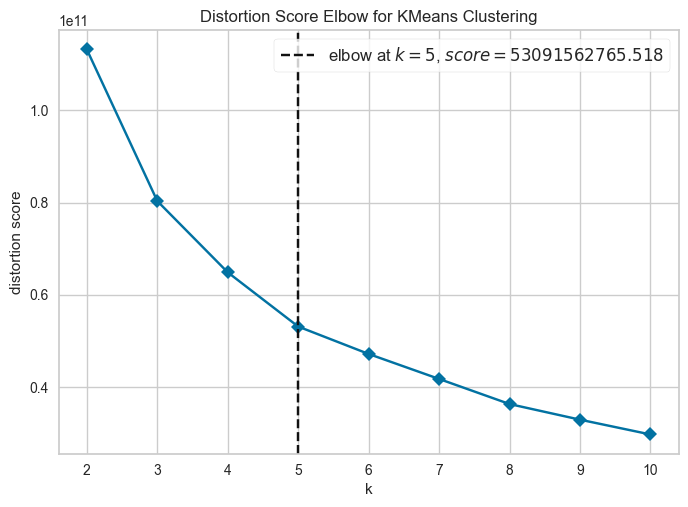

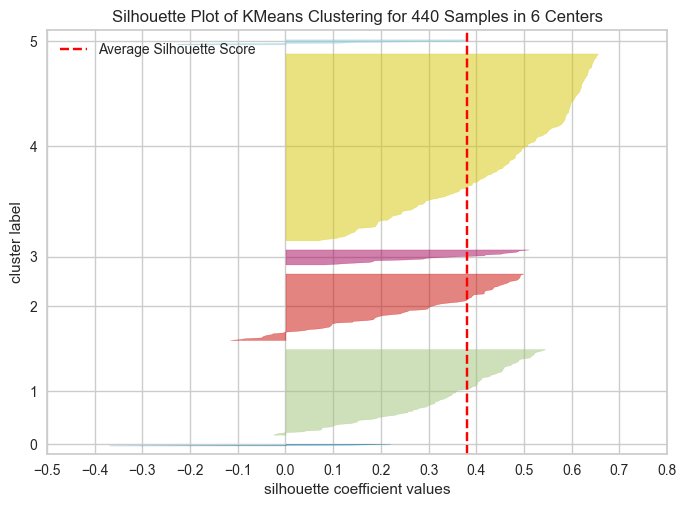

In [ ]:
for pt in plot_types: 
    plot_model(x, plot = pt)

### Using Transformation and Normalized

In [ ]:
#Using Transformation and Normalization on the data
setup(data = wholesale_customers, normalize = True, normalize_method = 'zscore', transformation = True, transformation_method = 'yeo-johnson', verbose = False)

In [ ]:
x = create_model('meanshift')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2472,136.3349,1.4208,0,0,0


In [ ]:
num_clusters = [4,5,6]

In [ ]:
Transformed_Normalized = pd.DataFrame()  # Used Yeo-Johnson transformation and ZScore normalization
for n in num_clusters: 
    x = create_model('meanshift', num_clusters=n)
    evaluation_results = pull()
    evaluation_results_df = pd.DataFrame(evaluation_results)
    evaluation_results_df['num_clusters'] = n
    Transformed_Normalized = pd.concat([evaluation_results_df, Transformed_Normalized], axis=0, ignore_index=True)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2472,136.3349,1.4208,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2184,121.2396,1.5850,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2350,111.1076,1.4393,0,0,0


In [ ]:
Transformed_Normalized.sort_values(by='num_clusters', ascending=True, inplace=True)

In [ ]:
Transformed_Normalized

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness,num_clusters
2,0.2472,136.3349,1.4208,0,0,0,4
1,0.2184,121.2396,1.5850,0,0,0,5
0,0.2350,111.1076,1.4393,0,0,0,6


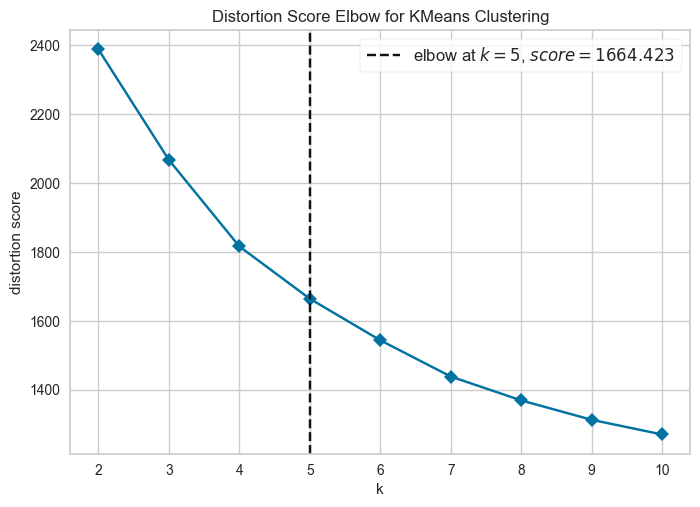

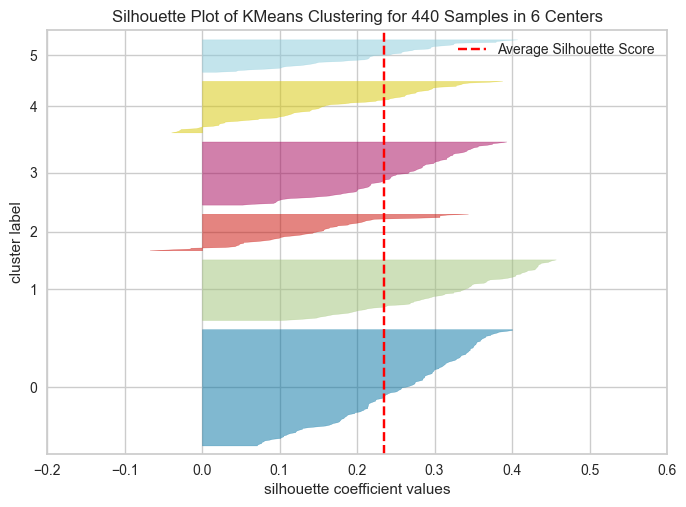

In [ ]:
for pt in plot_types: 
    plot_model(x, plot = pt)

### Using Transformation Normalization and PCA

In [ ]:
#Using PCA, Transformation and Normalization on the data
setup(data = wholesale_customers, pca = True, pca_method = 'linear', normalize = True, normalize_method = 'zscore', transformation = True, transformation_method = 'yeo-johnson', verbose = False)

In [ ]:
x = create_model('meanshift')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2472,136.3349,1.4208,0,0,0


In [ ]:
num_clusters = [4,5,6]

In [ ]:
Transformed_PCA_Normalized = pd.DataFrame()  # Used PCA, Yeo-Johnson transformation and ZScore normalization
for n in num_clusters: 
    x = create_model('meanshift', num_clusters=n)
    evaluation_results = pull()
    evaluation_results_df = pd.DataFrame(evaluation_results)
    evaluation_results_df['num_clusters'] = n
    Transformed_PCA_Normalized = pd.concat([evaluation_results_df, Transformed_PCA_Normalized], axis=0, ignore_index=True)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2472,136.3349,1.4208,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2164,120.4964,1.6149,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2031,111.1389,1.5949,0,0,0


In [ ]:
Transformed_PCA_Normalized.sort_values(by='num_clusters', ascending=True, inplace=True)

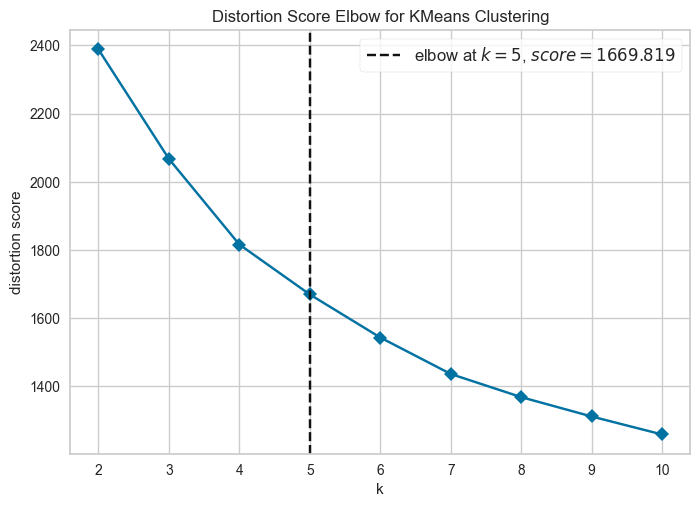

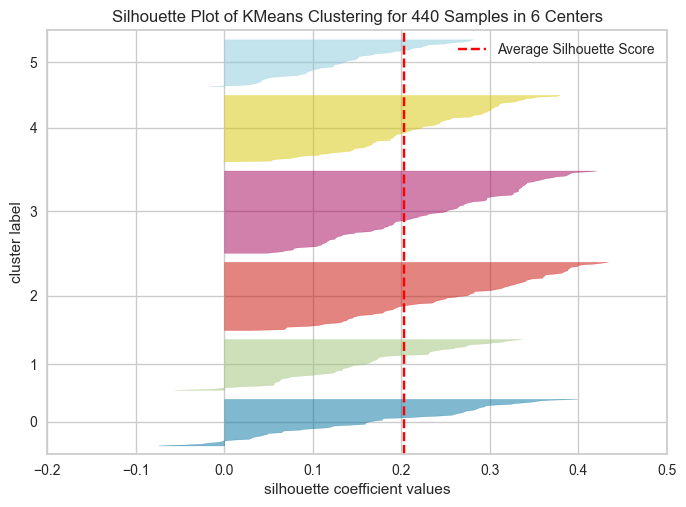

In [ ]:
for pt in plot_types:
    plot_model(x, plot = pt)

### Merging and creating a results table

In [ ]:
NDP

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness,num_clusters
2,0.3997,207.8159,0.9014,0,0,0,4
1,0.3635,214.0612,0.9122,0,0,0,5
0,0.3738,203.3787,0.8819,0,0,0,6


In [ ]:
Normalized

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness,num_clusters
2,0.3572,136.7115,1.1506,0,0,0,5
1,0.3549,145.5660,0.9311,0,0,0,6
0,0.3536,139.8993,1.0093,0,0,0,7


In [ ]:
Transformed

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness,num_clusters
2,0.8554,13039.7784,0.3389,0,0,0,3
1,0.5181,15162.6489,0.6203,0,0,0,4
0,0.4620,14221.6392,0.7017,0,0,0,5


In [ ]:
PCA

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness,num_clusters
2,0.3866,207.8197,0.9543,0,0,0,4
1,0.3635,214.0612,0.9122,0,0,0,5
0,0.3797,203.3709,0.8961,0,0,0,6


In [ ]:
Transformed_Normalized

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness,num_clusters
2,0.2472,136.3349,1.4208,0,0,0,4
1,0.2184,121.2396,1.5850,0,0,0,5
0,0.2350,111.1076,1.4393,0,0,0,6


In [ ]:
Transformed_PCA_Normalized

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness,num_clusters
2,0.2472,136.3349,1.4208,0,0,0,4
1,0.2164,120.4964,1.6149,0,0,0,5
0,0.2031,111.1389,1.5949,0,0,0,6


In [ ]:
columns_require_ground_truth = ['Homogeneity', 'Rand Index', 'Completeness']

In [ ]:
Results = [
    NDP, 
    Normalized,
    Transformed,
    PCA,
    Transformed_Normalized,
    Transformed_PCA_Normalized
]

In [ ]:
for result in Results: 
    result.drop(columns = columns_require_ground_truth, inplace = True)

In [ ]:
NDP_Transpose = NDP.T

In [ ]:
#name the columns as the number of clusters
NDP_Transpose.columns = ['c = 4', 'c = 5', 'c = 6']

In [ ]:
NDP_Transpose
#Delete the num_clusters row
NDP_Transpose = NDP_Transpose.drop('num_clusters', axis = 0)

In [ ]:
NDP_Transpose

,c = 4,c = 5,c = 6
Silhouette,0.3997,0.3635,0.3738
Calinski-Harabasz,207.8159,214.0612,203.3787
Davies-Bouldin,0.9014,0.9122,0.8819


In [ ]:
Normalized.T

,2,1,0
Silhouette,0.3572,0.3549,0.3536
Calinski-Harabasz,136.7115,145.5660,139.8993
Davies-Bouldin,1.1506,0.9311,1.0093
num_clusters,5.0000,6.0000,7.0000


In [ ]:
Normalized_Transpose = Normalized.T
Normalized_Transpose.columns = ['c = 5', 'c = 6', 'c = 7']
Normalized_Transpose.drop('num_clusters', axis = 0, inplace = True)

In [ ]:
Transformed.T

,2,1,0
Silhouette,0.8554,0.5181,0.4620
Calinski-Harabasz,13039.7784,15162.6489,14221.6392
Davies-Bouldin,0.3389,0.6203,0.7017
num_clusters,3.0000,4.0000,5.0000


In [ ]:
Transformed_Transpose = Transformed.T
Transformed_Transpose.columns = ['c = 3', 'c = 4', 'c = 5']
Transformed_Transpose.drop('num_clusters', axis = 0, inplace = True)

In [ ]:
PCA.T

,2,1,0
Silhouette,0.3866,0.3635,0.3797
Calinski-Harabasz,207.8197,214.0612,203.3709
Davies-Bouldin,0.9543,0.9122,0.8961
num_clusters,4.0000,5.0000,6.0000


In [ ]:
PCA_Transpose = PCA.T
PCA_Transpose.columns = ['c = 4', 'c = 5', 'c = 6']
PCA_Transpose.drop('num_clusters', axis = 0, inplace = True)

In [ ]:
Transformed_Normalized.T

,2,1,0
Silhouette,0.2472,0.2184,0.2350
Calinski-Harabasz,136.3349,121.2396,111.1076
Davies-Bouldin,1.4208,1.5850,1.4393
num_clusters,4.0000,5.0000,6.0000


In [ ]:
Transformed_Normalized_Transpose = Transformed_Normalized.T
Transformed_Normalized_Transpose.columns = ['c = 4', 'c = 5', 'c = 6']
Transformed_Normalized_Transpose.drop('num_clusters', axis = 0, inplace = True)

In [ ]:
Transformed_PCA_Normalized.T

,2,1,0
Silhouette,0.2472,0.2164,0.2031
Calinski-Harabasz,136.3349,120.4964,111.1389
Davies-Bouldin,1.4208,1.6149,1.5949
num_clusters,4.0000,5.0000,6.0000


In [ ]:
Transformed_PCA_Normalized_Transpose = Transformed_PCA_Normalized.T
Transformed_PCA_Normalized_Transpose.columns = ['c = 4', 'c = 5', 'c = 6']
Transformed_PCA_Normalized_Transpose.drop('num_clusters', axis = 0, inplace = True)

In [ ]:
def create_multiindex_columns(df, columns, groups):
    df.columns = pd.MultiIndex.from_arrays([columns, groups])
    return df

In [ ]:
NDP_Transpose

,c = 4,c = 5,c = 6
Silhouette,0.3997,0.3635,0.3738
Calinski-Harabasz,207.8159,214.0612,203.3787
Davies-Bouldin,0.9014,0.9122,0.8819


In [ ]:
NDP_Transpose = create_multiindex_columns(NDP_Transpose, ['c = 4', 'c = 5', 'c = 6'], ['NDP', 'NDP', 'NDP'])

In [ ]:
Normalized_Transpose

,c = 5,c = 6,c = 7
,Normalized,Normalized,Normalized
Silhouette,0.3572,0.3549,0.3536
Calinski-Harabasz,136.7115,145.5660,139.8993
Davies-Bouldin,1.1506,0.9311,1.0093


In [ ]:
Normalized_Transpose = create_multiindex_columns(Normalized_Transpose, ['c = 5', 'c = 6', 'c = 7'], ['Normalized', 'Normalized', 'Normalized'])

In [ ]:
Transformed_Transpose  

,c = 3,c = 4,c = 5
,Transformed,Transformed,Transformed
Silhouette,0.8554,0.5181,0.4620
Calinski-Harabasz,13039.7784,15162.6489,14221.6392
Davies-Bouldin,0.3389,0.6203,0.7017


In [ ]:
Transformed_Transpose = create_multiindex_columns(Transformed_Transpose, ['c = 3', 'c = 4', 'c = 5'], ['Transformed', 'Transformed', 'Transformed'])

In [ ]:
PCA_Transpose

,c = 4,c = 5,c = 6
Silhouette,0.3866,0.3635,0.3797
Calinski-Harabasz,207.8197,214.0612,203.3709
Davies-Bouldin,0.9543,0.9122,0.8961


In [ ]:
PCA_Transpose = create_multiindex_columns(PCA_Transpose, ['c = 4', 'c = 5', 'c = 6'], ['PCA', 'PCA', 'PCA'])

In [ ]:
PCA_Transpose

,c = 4,c = 5,c = 6
,PCA,PCA,PCA
Silhouette,0.3866,0.3635,0.3797
Calinski-Harabasz,207.8197,214.0612,203.3709
Davies-Bouldin,0.9543,0.9122,0.8961


In [ ]:
Transformed_Normalized_Transpose

,c = 4,c = 5,c = 6
Silhouette,0.2472,0.2184,0.2350
Calinski-Harabasz,136.3349,121.2396,111.1076
Davies-Bouldin,1.4208,1.5850,1.4393


In [ ]:
Transformed_Normalized_Transpose = create_multiindex_columns(Transformed_Normalized_Transpose, ['c = 4', 'c = 5', 'c = 6'], ['T+N', 'T+N', 'T+N'])

In [ ]:
Transformed_PCA_Normalized_Transpose 

,c = 4,c = 5,c = 6
,T+N+PCA,T+N+PCA,T+N+PCA
Silhouette,0.2472,0.2164,0.2031
Calinski-Harabasz,136.3349,120.4964,111.1389
Davies-Bouldin,1.4208,1.6149,1.5949


In [ ]:
Transformed_PCA_Normalized_Transpose = create_multiindex_columns(Transformed_PCA_Normalized_Transpose, ['c = 4', 'c = 5', 'c = 6'], ['T+N+PCA', 'T+N+PCA', 'T+N+PCA'])

In [ ]:
#Now concat all these dataframes into one
concatenated_results = pd.concat([NDP_Transpose, Normalized_Transpose, Transformed_Transpose, PCA_Transpose, Transformed_Normalized_Transpose, Transformed_PCA_Normalized_Transpose], axis = 1)

In [ ]:
concatenated_results

,c = 4,c = 5,c = 6,c = 5,c = 6,c = 7,c = 3,c = 4,c = 5,c = 4,c = 5,c = 6,c = 4,c = 5,c = 6,c = 4,c = 5,c = 6
,NDP,NDP,NDP,Normalized,Normalized,Normalized,Transformed,Transformed,Transformed,PCA,PCA,PCA,T+N,T+N,T+N,T+N+PCA,T+N+PCA,T+N+PCA
Silhouette,0.3997,0.3635,0.3738,0.3572,0.3549,0.3536,0.8554,0.5181,0.4620,0.3866,0.3635,0.3797,0.2472,0.2184,0.2350,0.2472,0.2164,0.2031
Calinski-Harabasz,207.8159,214.0612,203.3787,136.7115,145.5660,139.8993,13039.7784,15162.6489,14221.6392,207.8197,214.0612,203.3709,136.3349,121.2396,111.1076,136.3349,120.4964,111.1389
Davies-Bouldin,0.9014,0.9122,0.8819,1.1506,0.9311,1.0093,0.3389,0.6203,0.7017,0.9543,0.9122,0.8961,1.4208,1.5850,1.4393,1.4208,1.6149,1.5949


In [ ]:
from pretty_html_table import build_table
html_table_blue_light = build_table(concatenated_results, 'blue_light')

In [ ]:
with open('meanshift_Clustering_Results.html', 'w') as f:
    f.write(html_table_blue_light)